In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

viridis = mpl.colormaps["viridis"]


def color_p(p):
    return viridis(p / 8)

In [2]:
n_dims = 2
df = pd.read_csv(
    f"/home/jp7427/Desktop/FVHOE/out/compare_sd_timing_square_{n_dims=}.csv"
)
df["updates_per_s"] = df.steps * df.substeps * df.nDOFs / df.execution_time

/tmp/ipykernel_4176621/1262771023.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  leg = ax[0, 1].legend(loc="center", bbox_to_anchor=(1.35, 0.45), fontsize=fontsize)


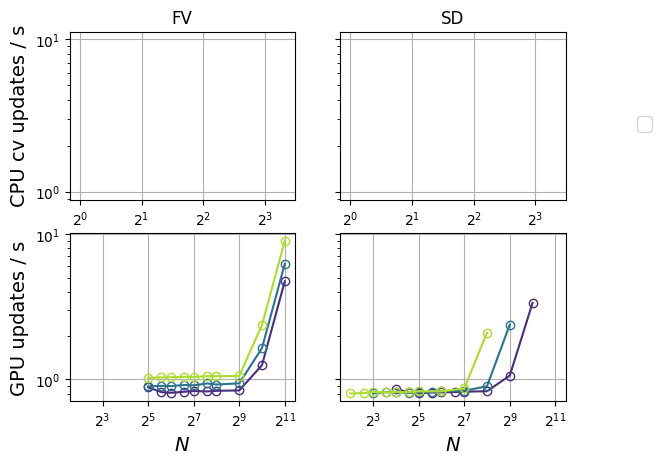

In [3]:
fontsize = 14

fig, ax = plt.subplots(2, 2, sharex="row", sharey="row")

nDOFs_xvar = False

for cupy, df_cupy in df.groupby("cupy"):
    for scheme, df_scheme in df_cupy.groupby("scheme"):
        for p, df_p in df_scheme.groupby("p"):
            ax[{True: 1, False: 0}[cupy], {"fv": 0, "sd": 1}[scheme]].plot(
                df_p.total_nDOFs if nDOFs_xvar else df_p.N,
                df_p.updates_per_s,
                color=color_p(p),
                label=f"{p=}",
                marker="o",
                mfc="none",
            )

    ax[0, 0].set_xscale("log", base=2)
ax[1, 0].set_xscale("log", base=2)
ax[0, 0].set_yscale("log")
ax[1, 0].set_yscale("log")
ax[0, 0].grid()
ax[0, 1].grid()
ax[1, 0].grid()
ax[1, 1].grid()

if nDOFs_xvar:
    ax[1, 0].set_xlabel("$\# DOFs$", fontsize=fontsize)
    ax[1, 1].set_xlabel("$\# DOFs$", fontsize=fontsize)
else:
    ax[1, 0].set_xlabel(r"$N$", fontsize=fontsize)
    ax[1, 1].set_xlabel(r"$N$", fontsize=fontsize)
ax[0, 0].set_ylabel("CPU cv updates / s", fontsize=fontsize)
ax[1, 0].set_ylabel("GPU updates / s", fontsize=fontsize)
ax[0, 0].set_title("FV")
ax[0, 1].set_title("SD")

leg = ax[0, 1].legend(loc="center", bbox_to_anchor=(1.35, 0.45), fontsize=fontsize)
for line, p in zip(leg.get_lines(), [1, 3, 7]):
    line.set_linestyle("none")
    line.set_marker("s")
    line.set_markersize(23)
    line.set_markerfacecolor(color_p(p))

fig.savefig(
    f"/home/jp7427/Desktop/FVHOE/out/compare_sd_timing_square_{n_dims=}.png",
    dpi=300,
    bbox_inches="tight",
)

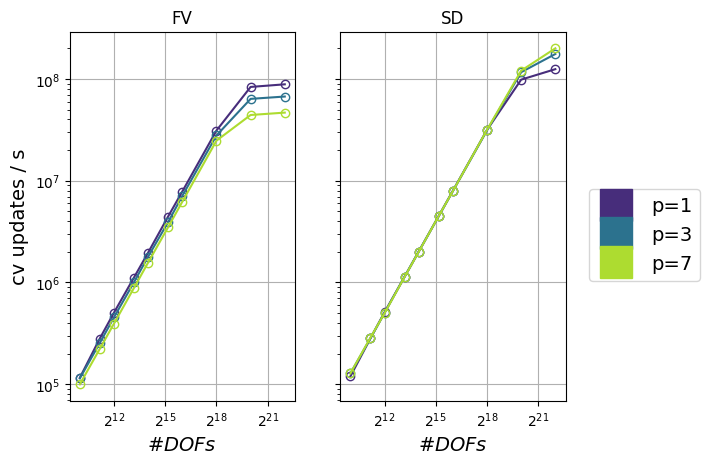

In [21]:
fontsize = 14

fig, ax = plt.subplots(1, 2, sharey=True)

nDOFs_xvar = True

for scheme, df_scheme in df.groupby("scheme"):
    for p, df_p in df_scheme.groupby("p"):
        ax[{"fv": 0, "sd": 1}[scheme]].plot(
            df_p.nDOFs if nDOFs_xvar else df_p.N,
            df_p.updates_per_s,
            color=color_p(p),
            label=f"{p=}",
            marker="o",
            mfc="none",
        )

ax[0].set_xscale("log", base=2)
ax[1].set_xscale("log", base=2)
ax[0].set_yscale("log")
ax[0].grid()
ax[1].grid()

if nDOFs_xvar:
    ax[0].set_xlabel("$\# DOFs$", fontsize=fontsize)
    ax[1].set_xlabel("$\# DOFs$", fontsize=fontsize)
else:
    ax[0].set_xlabel(r"$N$", fontsize=fontsize)
    ax[1].set_xlabel(r"$N$", fontsize=fontsize)
ax[0].set_ylabel("cv updates / s", fontsize=fontsize)
ax[0].set_title("FV")
ax[1].set_title("SD")

leg = ax[1].legend(loc="center", bbox_to_anchor=(1.35, 0.45), fontsize=fontsize)
for line, p in zip(leg.get_lines(), [1, 3, 7]):
    line.set_linestyle("none")
    line.set_marker("s")
    line.set_markersize(23)
    line.set_markerfacecolor(color_p(p))

fig.savefig(
    f"/home/jp7427/Desktop/FVHOE/out/compare_sd_timing_square_{n_dims=}.png",
    dpi=300,
    bbox_inches="tight",
)

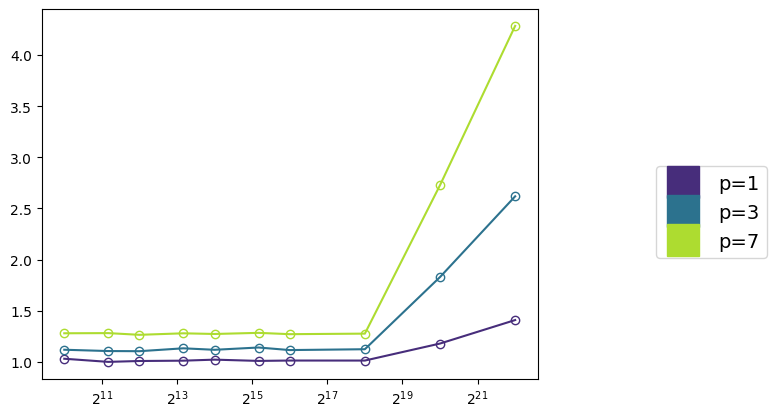

In [22]:
fontsize = 14

fig, ax = plt.subplots()


for p, df_p in df.groupby("p"):
    ax.plot(
        df_p[df_p.scheme == "sd"].nDOFs,
        df_p[df_p.scheme == "sd"].updates_per_s.to_numpy()
        / df_p[df_p.scheme == "fv"].updates_per_s.to_numpy(),
        color=color_p(p),
        label=f"{p=}",
        marker="o",
        mfc="none",
    )

ax.set_xscale("log", base=2)
# ax.set_yscale("log")
# ax.grid()

# ax[0].set_xlabel("$\# DOFs$", fontsize=fontsize)
# ax[1].set_xlabel("$\# DOFs$", fontsize=fontsize)
# ax[0].set_ylabel("cv updates / s", fontsize=fontsize)
# ax[0].set_title("FV")
# ax[1].set_title("SD")

leg = ax.legend(loc="center", bbox_to_anchor=(1.35, 0.45), fontsize=fontsize)
for line, p in zip(leg.get_lines(), [1, 3, 7]):
    line.set_linestyle("none")
    line.set_marker("s")
    line.set_markersize(23)
    line.set_markerfacecolor(color_p(p))